In [1]:
import quandl
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

In [2]:
df = quandl.get("WIKI/AMZN")
# Take a look at the data
print(df.head())

             Open   High    Low  Close     Volume  Ex-Dividend  Split Ratio  \
Date                                                                          
1997-05-16  22.38  23.75  20.50  20.75  1225000.0          0.0          1.0   
1997-05-19  20.50  21.25  19.50  20.50   508900.0          0.0          1.0   
1997-05-20  20.75  21.00  19.63  19.63   455600.0          0.0          1.0   
1997-05-21  19.25  19.75  16.50  17.13  1571100.0          0.0          1.0   
1997-05-22  17.25  17.38  15.75  16.75   981400.0          0.0          1.0   

            Adj. Open  Adj. High  Adj. Low  Adj. Close  Adj. Volume  
Date                                                                 
1997-05-16   1.865000   1.979167  1.708333    1.729167   14700000.0  
1997-05-19   1.708333   1.770833  1.625000    1.708333    6106800.0  
1997-05-20   1.729167   1.750000  1.635833    1.635833    5467200.0  
1997-05-21   1.604167   1.645833  1.375000    1.427500   18853200.0  
1997-05-22   1.437500   1.

In [3]:
# Get the Adjusted Close Price
df = df[['Adj. Close']]
#Take a look at the new data
print(df.head())

            Adj. Close
Date                  
1997-05-16    1.729167
1997-05-19    1.708333
1997-05-20    1.635833
1997-05-21    1.427500
1997-05-22    1.395833


In [4]:
df.iloc[-1]

Adj. Close    1497.05
Name: 2018-03-27 00:00:00, dtype: float64

In [5]:
forecast_out = 30 #'n=30' days
#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)
#print the new data set
print(df.tail())
#Shifted the data of last 30 days 

            Adj. Close  Prediction
Date                              
2018-03-21     1581.86         NaN
2018-03-22     1544.10         NaN
2018-03-23     1495.56         NaN
2018-03-26     1555.86         NaN
2018-03-27     1497.05         NaN


In [6]:
### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))
#print(X[0:5])

In [7]:
#Remove the last 'n' rows
X = X[:-forecast_out]
print(X)

[[   1.72916667]
 [   1.70833333]
 [   1.63583333]
 ...
 [1350.47      ]
 [1338.99      ]
 [1386.23      ]]


In [8]:
### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])
# Get all of the y values except the last 'n' rows
y = y[:-forecast_out]
print(y)


[1.54166667e+00 1.51583333e+00 1.58833333e+00 ... 1.49556000e+03
 1.55586000e+03 1.49705000e+03]


#### Splitting the data into training set and testing set

In [9]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Training the Model
#### Using SVM 

In [10]:
# Create and train the Support Vector Machine (Regressor)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)


svm confidence:  0.9471034601276145


#### Using Linear Regression

In [12]:
# Create and train the Linear Regression  Model
lr = LinearRegression()
# Train the model
lr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [13]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)


lr confidence:  0.9876501266873869


##### Predicting the data 
#### Using Linear Regression

In [14]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)


[[1414.51]
 [1451.05]
 [1461.76]
 [1448.69]
 [1468.35]
 [1482.92]
 [1484.76]
 [1500.  ]
 [1521.95]
 [1511.98]
 [1512.45]
 [1493.45]
 [1500.25]
 [1523.61]
 [1537.64]
 [1545.  ]
 [1551.86]
 [1578.89]
 [1598.39]
 [1588.18]
 [1591.  ]
 [1582.32]
 [1571.68]
 [1544.93]
 [1586.51]
 [1581.86]
 [1544.1 ]
 [1495.56]
 [1555.86]
 [1497.05]]
[1497.54655026 1536.31092842 1547.67290133 1533.80726306 1554.6640686
 1570.12101961 1572.07302989 1588.24076726 1611.52697691 1600.95005161
 1601.44866293 1581.29203499 1588.50598604 1613.28802966 1628.17210809
 1635.98014923 1643.25775279 1671.93320823 1692.62027375 1681.78873842
 1684.78040635 1675.57201001 1664.28429836 1635.90588797 1680.01707691
 1675.08400744 1635.02536159 1583.53048157 1647.50125341 1585.11118555]


#### Using SVM

In [15]:
# Print support vector regressor model predictions for the next 'n' days
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1054.64429316 1550.68766667  672.13516459 1078.37714044  672.10205822
  672.10205822  672.10205822  672.10205822  672.10205822  672.10205822
  672.10205822  672.10205822  672.10205822  672.10205822  672.10205822
  672.10205822  672.10205822  672.10205822  672.10205822  672.10205822
  672.10205822  672.10205822  672.10205822  672.10205822  672.10205822
  672.10205822  672.10205822  672.10205822  672.10205822  672.10205822]


#### Plotting 

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
from matplotlib import style
import datetime

Populating the interactive namespace from numpy and matplotlib


In [19]:
#For LinearRegression
style.use('ggplot')
last_date = df.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)



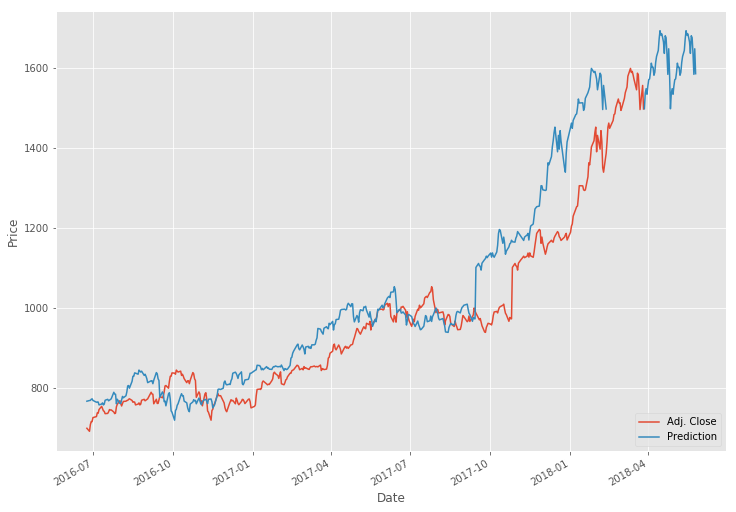

In [20]:
plt.figure(figsize=(12,9))
for i in lr_prediction:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].tail(500).plot()
df['Prediction'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
